In [ ]:
import pandas as pd
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = data.iloc[:,3:13]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = data.iloc[:,13:14]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
x = pd.get_dummies(x)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True


# Machine learning

1. Svm
2. xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()

# SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)

print(grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'C': 10, 'kernel': 'rbf'}


In [ ]:
param_grid = {
    'learning_rate': [0.3, 0.1, 0.01],
    'max_depth': [6, 10, 15]
}

In [ ]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
grid = GridSearchCV(model2, param_grid)
grid.fit(x_train, y_train)

print(grid.best_params_)


{'learning_rate': 0.1, 'max_depth': 6}


#DEEP LEARNING


# Modeling

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [ ]:
model = Sequential([
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units= 10, activation='relu'),
                    Dense(units=1, activation= 'sigmoid')
])

In [ ]:
from keras.optimizers import Adamax
opt = Adamax(learning_rate = 0.001)

In [ ]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit( x = x_train, y = y_train, batch_size= 8, epochs= 20)

Epoch 1/20
1000/1000 [==============================] - 5s 3ms/step - loss: 0.5278 - accuracy: 0.7959
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4981 - accuracy: 0.7961
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4866 - accuracy: 0.7961
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4770 - accuracy: 0.7961
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4695 - accuracy: 0.7961
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4605 - accuracy: 0.7961
Epoch 7/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4510 - accuracy: 0.7997
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4424 - accuracy: 0.8173
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4373 - accuracy: 0.8213
Epoch 10/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.432

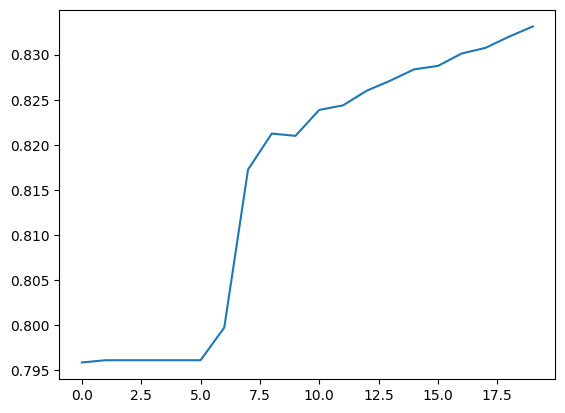

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 1.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units = 8 , activation="relu"),
    Dense(units = 8 , activation="relu"),
    Dense(units = 4 , activation="relu"),
    Dense(units = 1 , activation="sigmoid")    # output layer
])

In [ ]:
model.compile(optimizer="adam" , loss="binary_crossentropy" , metrics= ["accuracy"])

In [ ]:
model.fit(x = x_train, y = y_train, batch_size= 20, epochs = 30)

Epoch 1/30
400/400 [==============================] - 3s 3ms/step - loss: 0.5341 - accuracy: 0.7977
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7980
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.7980
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.8034
Epoch 5/30
400/400 [==============================] - 2s 4ms/step - loss: 0.4435 - accuracy: 0.8080
Epoch 6/30
400/400 [==============================] - 2s 4ms/step - loss: 0.4362 - accuracy: 0.8111
Epoch 7/30
400/400 [==============================] - 2s 4ms/step - loss: 0.4315 - accuracy: 0.8115
Epoch 8/30
400/400 [==============================] - 2s 5ms/step - loss: 0.4281 - accuracy: 0.8142
Epoch 9/30
400/400 [==============================] - 3s 8ms/step - loss: 0.4254 - accuracy: 0.8145
Epoch 10/30
400/400 [==============================] - 3s 8ms/step - loss: 0.4256 - accuracy: 0.8125